In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.layers import Dense, Input
from keras.models import Model

In [2]:
df = datasets.load_iris()
x = df.data
y = df.target
print("X:",x[0])
target_names = df.target_names
scaler = MinMaxScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

X: [5.1 3.5 1.4 0.2]


In [5]:
input_dim = x_scaled.shape[1]
encoding_dim = 2
input_img = Input(shape = (input_dim,))
encoded = Dense(encoding_dim, activation = 'linear')(input_img)
decoded = Dense(input_dim, activation = 'linear')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer = 'adam', loss = 'mse')
print(autoencoder.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 4)                 12        
                                                                 
Total params: 22 (88.00 Byte)
Trainable params: 22 (88.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


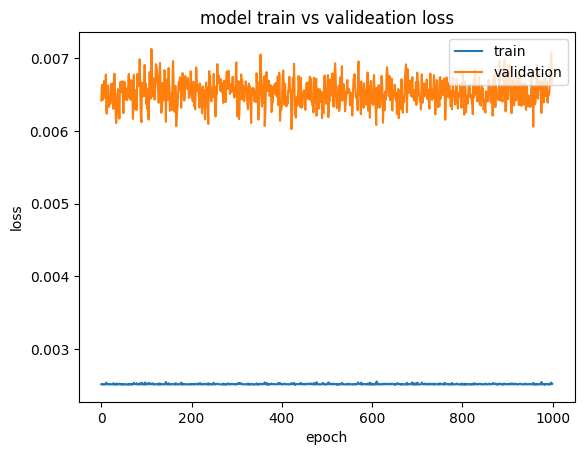

In [9]:
hist = autoencoder.fit(x_scaled, x_scaled, epochs = 1000, verbose = 0, batch_size = 16, validation_split = 0.1, shuffle = True)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model train vs valideation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend(['train', 'validation'], loc = 'upper right')
plt.show()

In [15]:
def plotting(x, title, vtitle):
  plt.figure()
  for i, target_name in zip([0,1,2], target_names):
    plt.scatter(x[y==i, 0], x[y==i, 1], label=target_name)
    plt.legend(loc = 'upper right')
    plt.title(title)
    plt.xlabel(vtitle + "1")
    plt.ylabel(vtitle + "2")
    plt.show()

5/5 [==============================] - 0s 2ms/step


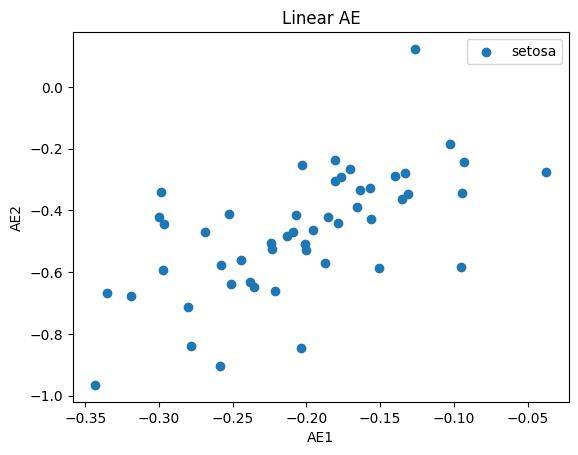

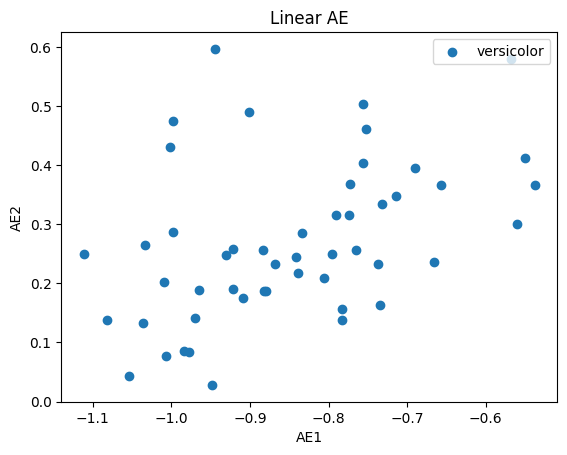

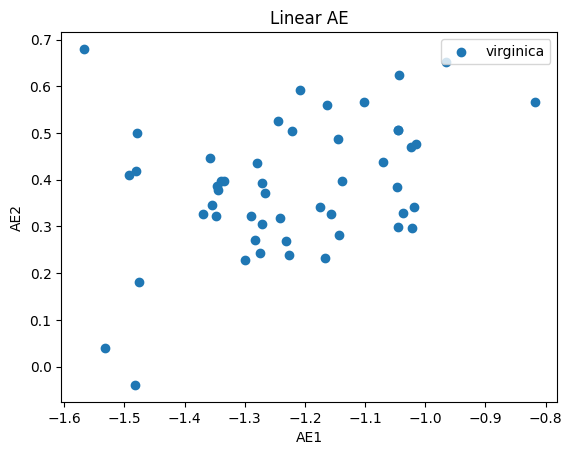

In [16]:
encoder = Model(input_img, encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
encoded_data = encoder.predict(x_scaled)
plotting(encoded_data[:,:2], 'Linear AE', 'AE')